In [1]:
import numpy as np 
import pandas as pd 

In [7]:
df = pd.read_csv("C:\\Users\\saurabh\\Desktop\\pyth\\titanic.csv" , usecols = ['Age' , 'Fare' , 'Survived'])

In [8]:
df

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [9]:
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import accuracy_score 

from sklearn.model_selection import cross_val_score 

from sklearn.preprocessing import KBinsDiscretizer 


from sklearn.compose import ColumnTransformer 

In [10]:
df.dropna(inplace = True) 

In [11]:
df.shape 

(331, 3)

In [13]:
x = df.iloc[: , 1:]

In [14]:
y = df.iloc[: , 0]

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [16]:
x_train.head(3) 

,Age,Fare
156,29.0,221.7792
126,22.0,7.7958
371,31.0,134.5000


In [18]:
clf = DecisionTreeClassifier()  

clf.fit(x_train,  y_train)

DecisionTreeClassifier()

In [19]:
y_pred = clf.predict(x_test)

In [20]:
accuracy_score(y_test , y_pred)

0.5223880597014925

In [22]:
np.mean(cross_val_score(DecisionTreeClassifier() ,x ,y , cv = 10 , scoring = "accuracy"))

0.5650623885918004

In [24]:
kbin_age = KBinsDiscretizer(n_bins = 15 , encode = 'ordinal'  , strategy = 'quantile')

In [25]:
kbin_fare = KBinsDiscretizer(n_bins = 15 , encode = 'ordinal' , strategy = 'quantile') 

In [28]:
trf = ColumnTransformer([
    ('first' , kbin_age , [0]) , 
    ('second' , kbin_fare , [1])
])

In [29]:
trf

ColumnTransformer(transformers=[('first',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [0]),
                                ('second',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [1])])

In [30]:
x_train_trf = trf.fit_transform(x_train)

In [31]:
x_test_trf = trf.transform(x_test)

In [33]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.17      , 11.76666667, 18.        , 20.6       , 22.        ,
              23.        , 25.        , 27.        , 29.        , 30.        ,
              35.        , 38.43333333, 42.        , 47.        , 54.46666667,
              76.        ])                                                   ],
      dtype=object)

In [40]:
output = pd.DataFrame({
    'age' : x_train['Age'],
    'age_trf' : x_train_trf[: , 0] , 
    'Fare' : x_train['Fare'] , 
    'Fare_trf' : x_train_trf[: , 1]
})

In [41]:
output

,age,age_trf,Fare,Fare_trf
156,29.0,8.0,221.7792,14.0
126,22.0,4.0,7.7958,2.0
371,31.0,9.0,134.5000,13.0
350,45.0,12.0,63.3583,12.0
336,32.0,9.0,13.0000,6.0
...,...,...,...,...
222,22.0,4.0,10.5000,4.0
221,21.0,3.0,8.0500,3.0
376,22.0,4.0,8.6625,4.0
119,29.0,8.0,26.0000,9.0


In [43]:
output['age_labels'] = pd.cut(x = x_train['Age'] , bins = trf.named_transformers_['first'].bin_edges_[0].tolist())

output['fare_labels']  = pd.cut(x = x_train['Fare'] , bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [45]:
output.sample(5)

,age,age_trf,Fare,Fare_trf,age_labels,fare_labels
171,27.0,7.0,7.2250,0.0,"(25.0, 27.0]","(0.0, 7.268]"
374,54.0,13.0,81.8583,13.0,"(47.0, 54.467]","(79.2, 157.764]"
318,27.0,7.0,7.8542,2.0,"(25.0, 27.0]","(7.796, 7.896]"
18,27.0,7.0,7.9250,3.0,"(25.0, 27.0]","(7.896, 8.662]"
166,48.0,13.0,50.4958,11.0,"(47.0, 54.467]","(36.97, 57.75]"


In [46]:
clf = DecisionTreeClassifier() 
clf.fit(x_train_trf , y_train) 

DecisionTreeClassifier()

In [48]:
y_pred2 = clf.predict(x_test_trf)

In [49]:
accuracy_score(y_test , y_pred2)

0.5671641791044776

In [50]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier() , x , y , scoring = 'accuracy'))

0.5711442786069652

In [77]:
def discretize(bins , strategy): 
    kbin_age = KBinsDiscretizer(n_bins = bins , encode = 'ordinal' , strategy = strategy )
    kbin_fare = KBinsDiscretizer(n_bins = bins , encode = 'ordinal' , strategy = strategy) 
    
    trf = ColumnTransformer([
        ('first' , kbin_age , [0]), 
        ('second' , kbin_fare , [1])
    ])
    
    x_trf  = trf.fit_transform(x) 
    print(np.mean(cross_val_score(DecisionTreeClassifier() , x , y, scoring = 'accuracy')))
    
    plt.figure(figsize = (14,4))
    plt.subplot(121) 
    plt.hist(x['Age'])
    plt.title(" Age Before") 
    
    plt.subplot(122) 
    plt.hist(x_trf[: , 0] , color = 'red')
    plt.title("Age After")
    
    plt.show()  
    
    plt.figure(figsize = (14 , 4))
    plt.subplot(121) 
    plt.hist(x['Fare'])
    plt.title("Fare Before")
    
    plt.subplot(122) 
    plt.hist(x_trf[: , 1] , color = 'red')
    plt.title("Fare After")
    
    plt.show() 
    

C:\Users\saurabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\saurabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.5682044323835369


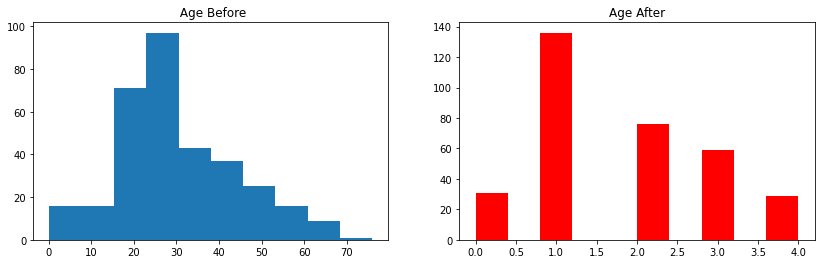

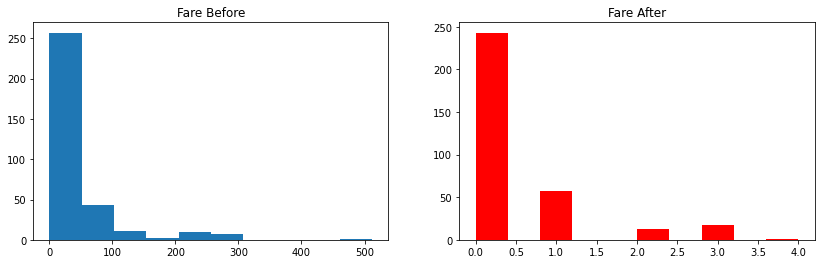

In [78]:
discretize(5 , 'kmeans')